In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import imread
%matplotlib inline

In [284]:
im = imread('Broadway_tower_edit.jpg')
#im = imread('HJoceanSmall.jpg')

In [285]:
im.shape

(968, 1428, 3)

(-0.5, 1427.5, 967.5, -0.5)

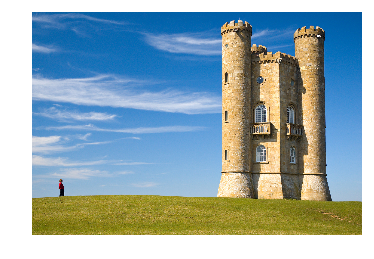

In [286]:
plt.imshow(im); plt.axis('off')

In [416]:
slice_x1 = im[1:-1, 2:, :]
slice_x2 = im[1:-1, :-2, :]
slice_y1 = im[2:, 1:-1, :]
slice_y2 = im[:-2, 1:-1, :]

In [417]:
energy = np.zeros(im.shape[:2], dtype=np.float64)

In [418]:
energy[1:-1, 1:-1] = np.sqrt(np.sum((slice_x1 - slice_x2)**2, axis=2) + np.sum((slice_y1 - slice_y2)**2, axis=2))

In [419]:
energy.shape
energy.dtype

dtype('float64')

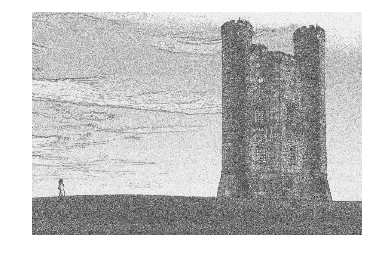

In [420]:
plt.imshow(energy); plt.axis('off');

In [421]:
ENERGY_BORDER = np.NaN
energy[0, :] = ENERGY_BORDER
energy[-1, :] = ENERGY_BORDER
energy[:, 0] = ENERGY_BORDER
energy[:, -1] = ENERGY_BORDER

In [424]:
energy

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,   5.83095189,  13.49073756, ...,   6.244998  ,
          4.79583152,          nan],
       [         nan,  14.24780685,  13.37908816, ...,   4.        ,
          4.79583152,          nan],
       ..., 
       [         nan,  26.38181192,  20.174241  , ...,  20.34698995,
         15.49193338,          nan],
       [         nan,  17.52141547,  18.65475811, ...,  21.97726098,
         26.70205985,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [425]:
seam_energy = np.zeros(energy.shape)

In [426]:
#seam_energy[0, :] = energy[0, :]

In [427]:
seam_energy[0, 0] = energy[0, 0]
seam_energy[0, -1] = energy[0, -1]

In [428]:
for i in xrange(1, energy.shape[0]-1):
    seam_energy[i, 1:-1] = np.fmin(np.fmin(seam_energy[i-1, :-2], seam_energy[i-1, 1:-1]), seam_energy[i-1, 2:]) + energy[i, 1:-1]
    seam_energy[i, 0] = seam_energy[i-1, 0] + energy[i, 0]
    seam_energy[i, -1] = seam_energy[i-1, 0] + energy[i, -1]

In [429]:
seam_energy[-2]

array([           nan,  8329.49258126,  8330.42666725, ...,  6672.07446532,
        6680.02580345,            nan])

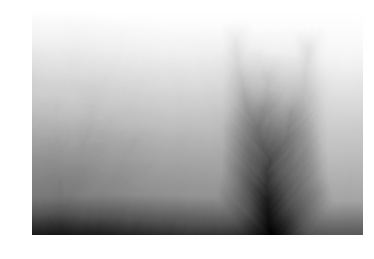

In [430]:
plt.imshow(seam_energy[1:-1, 1:-1]); plt.axis('off');

In [461]:
(m, n) = seam_energy.shape
path = np.zeros(m)
col = np.nanargmin(seam_energy[-2])
path[-1] = path[-2] = col

In [462]:
for i in range(m-3, 0, -1):
    tgt_energy = seam_energy[i+1, col] - energy[i+1, col]
    tgt_idx = np.nanargmin(seam_energy[i, col-1:col+2] - tgt_energy)
    path[i] = col = col + tgt_idx - 1

In [463]:
path[0] = path[1]

In [467]:
path_y = np.arange(m)

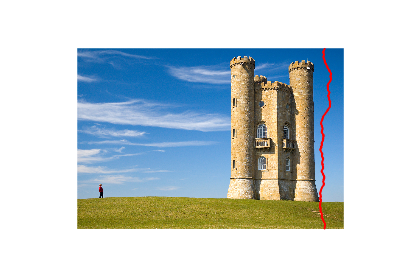

In [470]:
plt.imshow(im); plt.axis('off');
plt.plot(path, path_y, color='red')